`About Dataset`
Similar Datasets
CERN Proton Collision Dataset: LINK
Airfoil Self-Noise Dataset: LINK
CERN Electron Collision Data: LINK
Wind Speed Prediction Dataset: LINK
Spanish Wine Quality Dataset: LINK
Context
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
alpha = Right Ascension angle (at J2000 epoch)
delta = Declination angle (at J2000 epoch)
u = Ultraviolet filter in the photometric system
g = Green filter in the photometric system
r = Red filter in the photometric system
i = Near Infrared filter in the photometric system
z = Infrared filter in the photometric system
run_ID = Run Number used to identify the specific scan
rereun_ID = Rerun Number to specify how the image was processed
cam_col = Camera column to identify the scanline within the run
field_ID = Field number to identify each field
spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
class = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
plate = plate ID, identifies each plate in SDSS
MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation
Citation
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

Acknowledgements
The data released by the SDSS is under public domain. Its taken from the current data release RD17.

More information about the license: http://www.sdss.org/science/image-gallery/
SDSS Publications:

Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

In [101]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
st=pd.read_csv("/content/star_classification.csv")

In [41]:
st.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


obj_ID --> obj_ID Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha --> Right Ascension angle (at J2000 epoch)

delta --> Declination angle (at J2000 epoch)

u --> Ultraviolet filter in the photometric system

g --> Green filter in the photometric system

r --> Red filter in the photometric system

i --> Near Infrared filter in the photometric system

z --> Infrared filter in the photometric system

run_ID --> Run Number used to identify the specific scan

rereun_ID --> Rerun Number to specify how the image was processed

cam_col --> Camera column to identify the scanline within the run

field_ID --> Field number to identify each field

spec_obj_ID --> Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class --> object class (galaxy, star or quasar object)

redshift --> redshift value based on the increase in wavelength

plate --> plate ID, identifies each plate in SDSS

MJD --> Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID --> fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [42]:
st.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [43]:
st.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [44]:
st.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


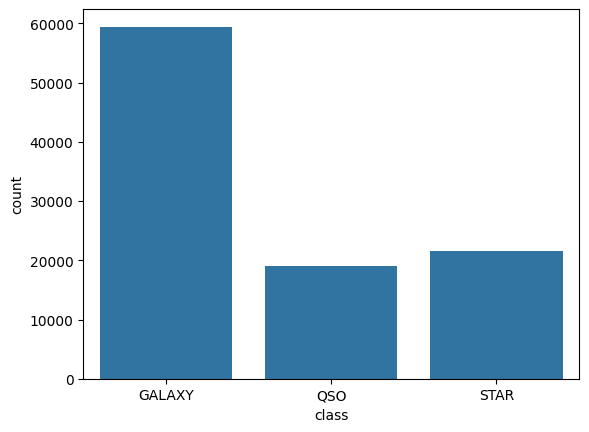

In [46]:
sns.countplot( x = 'class' ,data= st )
plt.show()

<ipython-input-105-2ba1fe9585bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(st.corr(),annot=True,linewidths=1, annot_kws={"fontsize": 6})


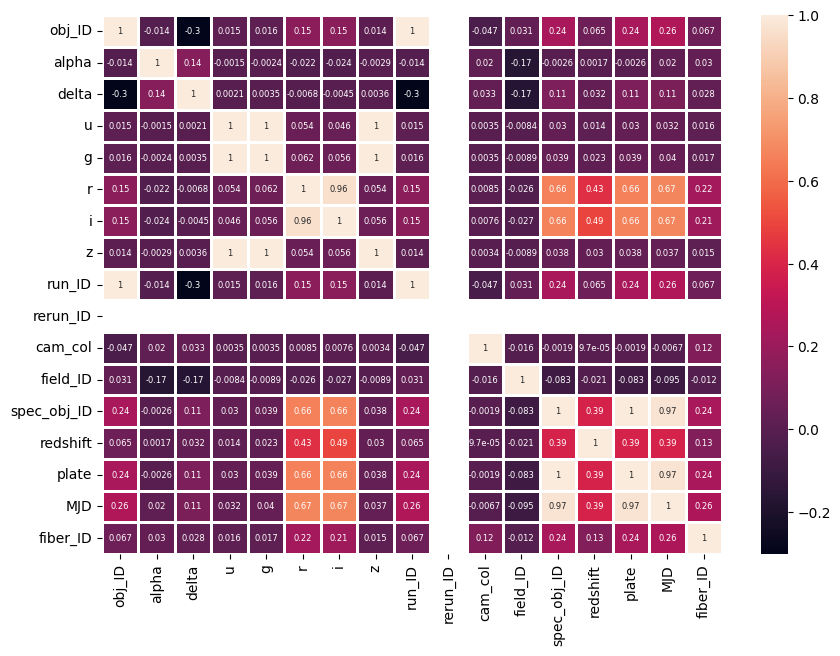

In [105]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.heatmap(st.corr(),annot=True,linewidths=1, annot_kws={"fontsize": 6})
plt.show()

In [47]:
x=st.drop(columns='class',axis=1)
y=st["class"]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,stratify=y)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 17), (20000, 17), (80000,), (20000,))

In [50]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [51]:
scaler=LabelEncoder()
y_train_scaled=scaler.fit_transform(y_train)
y_test_scaled=scaler.transform(y_test)

In [98]:
model=Sequential()
model.add(Dense(17,activation="relu",input_shape=(17,)))
model.add(Dense(15,activation="relu",))
model.add(Dense(10,activation="relu",))
model.add(Dense(1,activation="sigmoid"))

In [99]:
model.compile(optimizer='adam',loss='mse',metrics=["acc"])

In [100]:
model.fit(x_train_scaled,y_train_scaled,epochs=30,batch_size=32)

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3674 - acc: 0.6289
Epoch 2/30
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2736 - acc: 0.7265
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2624 - acc: 0.7366
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2583 - acc: 0.7404
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2554 - acc: 0.7425
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2534 - acc: 0.7442
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2526 - acc: 0.7448
Epoch 8/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2513 - acc: 0.7460
Epoch 9/30
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2497 - acc: 0.7477
Epoch 10/30
2500/2500 [==============================] - 4s 2ms/step - loss: 0.2500 - acc: 0.7469
Epoch 11/30
2500/2500 [======

In [104]:
score=model.evaluate(x_test_scaled,y_test_scaled,verbose=1)

625/625 [==============================] - 2s 3ms/step - loss: 0.2438 - acc: 0.7519
